<a href="https://colab.research.google.com/github/Hrithik-Nigam/Image-Classification/blob/main/ImageClassification(Hrithik_Nigam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with support vector machine


1.   Data gathering- done through Kaggle.
2.   Splitting data into training and testing sets.
3.   Importing models along with respective libraries.
4.   Selecting best model through hyperperameter tuning using GridSearchCV().
5.   Fitting data sets into models selected in step 4.
6.   Checking the accuracy score and precision score.
7.   Checking the output of arbitary data.




In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np

The data has been imported by mounting the drive.

In [51]:
data_dir_bt='/content/drive/MyDrive/Image_classification/brain_tumor_dataset'
output_img= []
input_img=[]
flat_img=[]
categories_bt=['no', 'yes']

# Resizing the images for training brain tumor model

In [52]:
for cat1 in categories_bt:
  class_num= categories_bt.index(cat1)
  path= os.path.join(data_dir_bt, cat1)
  for img in os.listdir(path):
    img_array1 = imread(os.path.join(path, img))
    resized_img=resize(img_array1, (150,150,3))
    flat_img.append(np.ndarray.flatten(resized_img))
    input_img.append(resized_img)
    output_img.append(class_num)
  
flat_img= np.array(flat_img)
input_img= np.array(input_img)
output_img= np.array(output_img)

In [53]:
data_dir_pn= '/content/drive/MyDrive/Image_classification/lungs'
categories_pn=['pn', 'normal']
output_img2= []
input_img2=[]
flat_img2=[]

# Resizing the images for training pneumonia model

In [54]:
for cat2 in categories_pn:
  class_num2= categories_pn.index(cat2)
  path2= os.path.join(data_dir_pn, cat2)
  for img2 in os.listdir(path2):
    img_array2 = imread(os.path.join(path2, img2))
    resized_img2=resize(img_array2, (150,150,3))
    flat_img2.append(np.ndarray.flatten(resized_img2))
    input_img2.append(resized_img2)
    output_img2.append(class_num2)
  
flat_img2= np.array(flat_img2)
input_img2= np.array(input_img2)
output_img2= np.array(output_img2)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(flat_img, output_img, test_size=0.25, random_state=27)

# Training the model using Support Vector Machine
Here GridSearchCv is used for hyperparameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
clf_bt= GridSearchCV(estimator=svm.SVC(), param_grid= [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
 ])
clf_bt.fit(x_train, y_train)
y_pred=clf_bt.predict(x_test)

Accuracy is computed as a float less than 1. So it has been subjected to some additional calculations to show accuracy in percentage.

In [57]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred,y_test)*100, '%')

78.125 %


Precision table using classification report for brain tumor model.


In [58]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.80      0.85      0.83        39

    accuracy                           0.78        64
   macro avg       0.77      0.76      0.77        64
weighted avg       0.78      0.78      0.78        64



In [59]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2= train_test_split(flat_img2, output_img2, test_size=0.25, random_state=27)

# Training the model using Support Vector Machine
Here GridSearchCv is used for hyperparameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
clf_pn= GridSearchCV(estimator=svm.SVC(), param_grid= [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
 ])
clf_pn.fit(x_train2, y_train2)
y_pred2=clf_pn.predict(x_test2)

Accuracy is computed as a float less than 1. So it has been subjected to some additional calculations to show accuracy in percentage.

In [61]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred2,y_test2)*100,'%')

94.5945945945946 %


Precision table using classification report.

In [62]:
print(classification_report(y_pred2, y_test2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        30

    accuracy                           0.95        37
   macro avg       0.91      0.91      0.91        37
weighted avg       0.95      0.95      0.95        37



# Final Implementation-
 
Here the user will have to select the type of test they are performing.<br> First they have to select the model and then enter the image url.<br> The output will be displayed in a single sentence using f-string.



In [63]:
import pickle
pickle.dump(clf_bt, open("bt_clfn.p","wb"))
pickle.dump(clf_pn, open("pn_clfn.p","wb"))

Opening Pickle files again

Welcome, please select the option number for your choice: 
1. for checking brain tumor 
2. for checking pneumonia

2
Checking for pneumonia...

Enter the url for your image: https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5fc3d8721aa1a19e3333fac2%2FNormal-chest-x-ray-in-a-healthy-adult-male%2F960x0.jpg
Predicted output: The pneumonia test was negative.


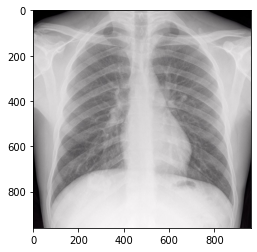

In [67]:
import pickle
from skimage.io import imread

categories_bt=['no', 'yes']
categories_pn=['pn', 'normal']

print('Welcome, please select the option number for your choice: \n1. for checking brain tumor \n2. for checking pneumonia\n')
ans=int(input())
if(ans==1):
  final_model = pickle.load(open("bt_clfn.p","rb"))
  flat_img =[]
  print('Checking for brain tumor...\n')
  url=input('Enter the url for your image: ')
  img_new= imread(url)
  img_n_resize= resize(img_new,(150,150,3))
  flat_img.append(np.ndarray.flatten(img_n_resize))
  plt.imshow(img_new)
  yout=final_model.predict(flat_img)
  yout=categories_bt[yout[0]]
  if(yout=='yes'):
    st='A tumor can be observed.'
  else:
    st='No signs of any tumor.'
  print(f'Predicted output: {st}')
elif(ans==2):
  final_model = pickle.load(open("pn_clfn.p","rb"))
  flat_img =[]
  print('Checking for pneumonia...\n')
  url=input('Enter the url for your image: ')
  img_new= imread(url)
  img_n_resize= resize(img_new,(150,150,3))
  flat_img.append(np.ndarray.flatten(img_n_resize))
  plt.imshow(img_new)
  yout=final_model.predict(flat_img)
  yout=categories_pn[yout[0]]
  if(yout=='pn'):
    st='The pneumonia test was positive.'
  else:
    st='The pneumonia test was negative.'
  print(f'Predicted output: {st}')
else:
  print('Invalid choice!')

#Deployment:
<li>Using streamlit along with ngrok</li>

In [1]:
!pip install streamlit

In [27]:
%%writefile myapp.py
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import os
import pickle
import io
from PIL import Image

output_img= []
input_img=[]
flat_img=[]
categories_pn=['pn', 'normal']
categories_bt=['no', 'yes']

st.title("Brain/Lung")
st.write('Welcome, please select the option number for your choice:')
st.write('1. for checking brain tumor')
st.write('2. for checking pneumonia.')
ans=st.text_input("Choose 1 or 2:")
if int(ans)==1:
  final_model = pickle.load(open("bt_clfn.p","rb"))
  flat_img =[]
  st.text('Checking for brain tumor...\n')
  st.text("Upload the image")
  upload_file = st.file_uploader("Choose an image", type="jpg")
  if upload_file is not None:
    img= Image.open(upload_file)
    st.image(img, caption="Successfully Uploaded")
    img= np.array(img)
    img_n_resize= resize(img,(150,150,3))
    flat_img.append(np.ndarray.flatten(img_n_resize))
    yout=final_model.predict(flat_img)
    yout=categories_bt[yout[0]]
    if st.button('Predict'):
      if yout=='yes':
        strn='A tumor can be observed.'
      else:
        strn='No signs of any tumor.'
      st.title(strn)
elif int(ans)==2:
  final_model = pickle.load(open("pn_clfn.p","rb"))
  flat_img =[]
  print('Checking for pneumonia...\n')
  st.text("Upload the image")
  upload_file = st.file_uploader("Choose an image", type="jpg")
  if upload_file is not None:
    img= Image.open(upload_file)
    st.image(img, caption="Successfully Uploaded")
    img=np.array(img)
    img_n_resize= resize(img,(150,150,3))
    flat_img.append(np.ndarray.flatten(img_n_resize))
    yout=final_model.predict(flat_img)
    yout=categories_pn[yout[0]]
    if st.button('Predict'):
      if yout=='pn':
        strn='The pneumonia test was positive.'
      else:
        strn='The pneumonia test was negative.'
      st.title(strn)
else:
  st.write('Invalid choice!')

Overwriting myapp.py


In [28]:
!streamlit run --server.port 80 myapp.py --&>/dev/null&

In [10]:
! pip install pyngrok

In [11]:
! ngrok authtoken 1x2lJ4Txk2eLZrsmqAemcMk5wy8_4JM97nLb4Vo4aYF4F22dQ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [12]:
from pyngrok import ngrok
url = ngrok.connect(port = '8501')

In [7]:
url

<NgrokTunnel: "http://9042-34-80-195-134.ngrok.io" -> "http://localhost:80">

In [23]:
#ngrok.kill()